In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skimage.util import invert
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, erosion, dilation, area_closing, remove_small_objects
import scipy.ndimage as ndi

In [2]:
# first data, read CSV + image
path = '../../Data/'
f_img = cv2.imread(path + 'ex04.jpg')
gray_f_img = cv2.cvtColor(f_img, cv2.COLOR_BGR2GRAY)
f_gt = pd.read_csv(path + 'ex04.csv', header=None)

In [3]:
f_gt

,0,1
0,404.0,726.0
1,456.0,632.0
2,456.0,1193.0
3,458.0,746.0
4,495.0,657.0
5,524.0,1000.0
6,568.0,596.0
7,600.0,1077.0
8,666.0,1837.0
9,668.0,1230.0


In [4]:
def plot_img(img, gt, title):
    xs = list(gt[0])
    ys = list(gt[1])
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    for idx in range(len(xs)):
        j, i = ys[idx], xs[idx]
        plt.scatter(j, i, color='r')
    plt.show()

In [5]:
gray_f_img

array([[145, 145, 146, ..., 165, 165, 165],
       [147, 147, 147, ..., 165, 165, 165],
       [149, 149, 148, ..., 165, 165, 165],
       ...,
       [145, 145, 145, ..., 161, 162, 162],
       [144, 143, 143, ..., 161, 161, 161],
       [143, 142, 141, ..., 161, 161, 161]], dtype=uint8)

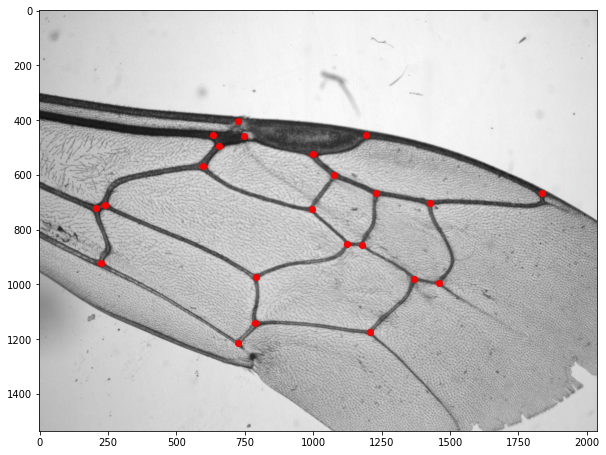

In [6]:
plot_img(gray_f_img, f_gt, title='')

In [7]:
# threshold image
threshold_val = 95
ret, img = cv2.threshold(gray_f_img, threshold_val, 255, 0)

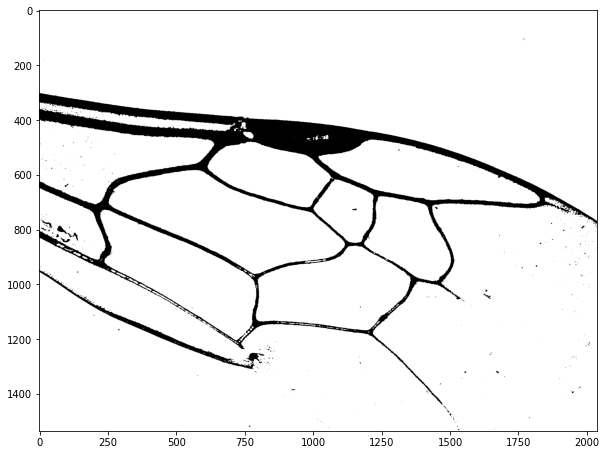

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.show()

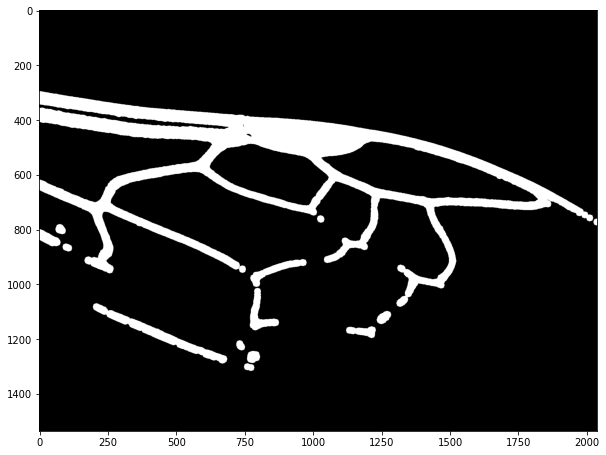

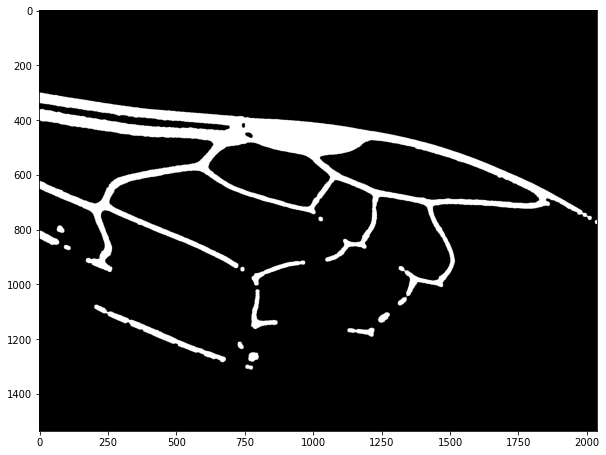

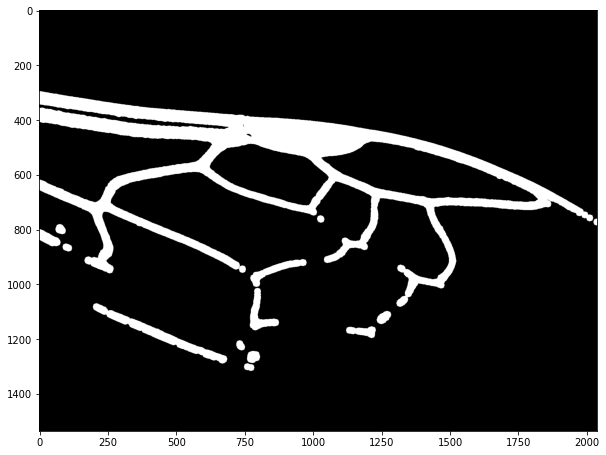

In [11]:
image = invert(img)
tmp = dilation(tmp, square(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

tmp = erosion(tmp, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

tmp = dilation(tmp, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

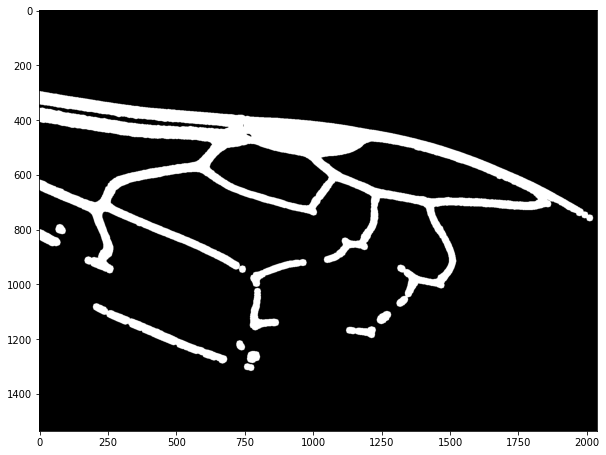

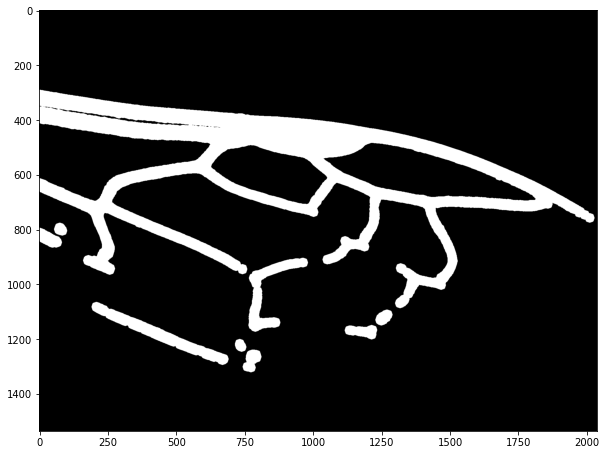

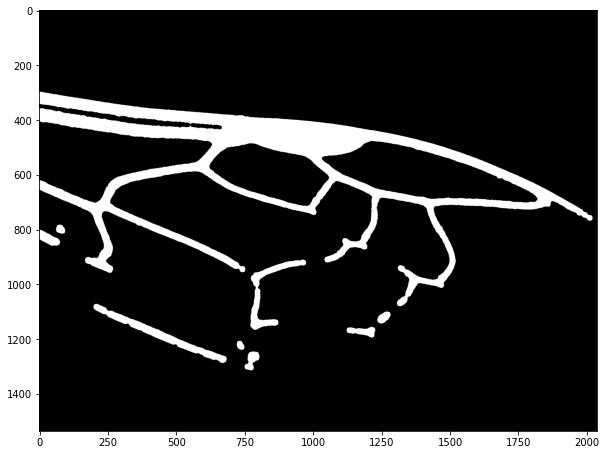

In [12]:
tmp_bin = (tmp > 0).copy()
tmp_bin = remove_small_objects(tmp_bin, min_size=800)
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply little dilation
tmp_bin = dilation(tmp_bin, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply erosion
tmp_bin = erosion(tmp_bin, disk(7))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

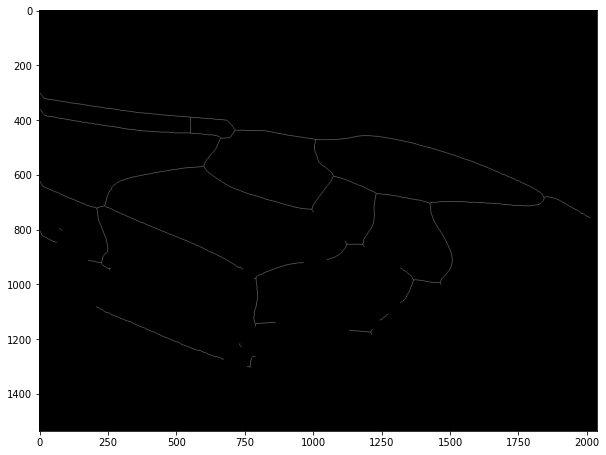

In [15]:
skeleton = skeletonize(tmp_bin)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray')
plt.show()

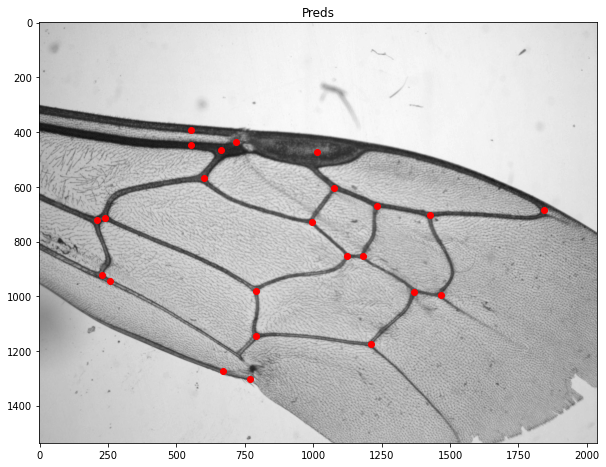

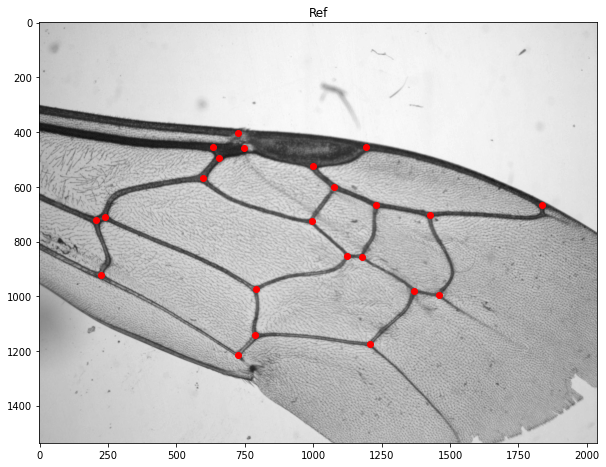

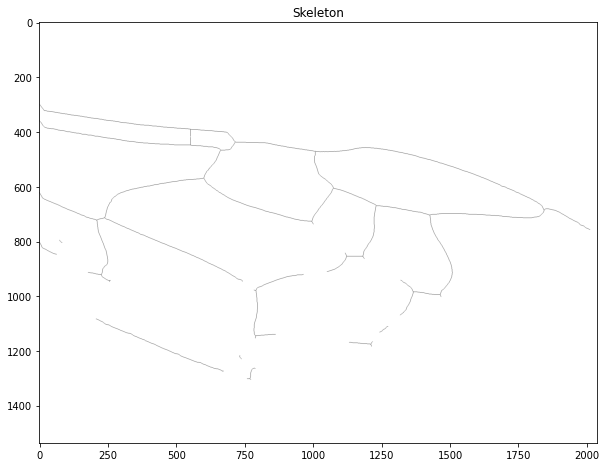

In [17]:
branches = np.zeros_like(skeleton, dtype=bool)
branches.shape

selems = list()
selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]))
selems.append(np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]]))
selems.append(np.array([[0, 0, 1], [1, 1, 1], [0, 1, 0]]))
selems = [np.rot90(selems[i], k=j) for i in range(5) for j in range(4)]

selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))

for selem in selems:
    branches |= ndi.binary_hit_or_miss(skeleton, selem)
    
res = np.where(branches == True)

# build pandas datafram
data = {
    0: list(res[0]),
    1: list(res[1])
}
df_res = pd.DataFrame(data)

plot_img(gray_f_img, df_res, title='Preds')
plot_img(gray_f_img, f_gt, title='Ref')

plt.figure(figsize=(10,8))
plt.title('Skeleton')
plt.imshow(np.invert(skeleton), cmap='gray')
plt.show()